### Data analysis based on different experiment types for TTP

In [130]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [ ]:
dataset_label = {0: 'a280-n279', 1: 'a280-n1395', 2: 'a280-n2790', 3: 'fnl4461-n4460', 4: 'fnl4461-n22300', 
                5: 'fnl4461-n44600', 6: 'pla33810-n33809', 7: 'pla33810-n169045', 8: 'pla33810-n338090'}

mutation_label = {0: 'single_point + bitflip', 1: 'single_point + inversion', 2: 'single_point + gaussian', 13: 'ordered + gaussian', 20: 'ordered + inversion'}

crossover_label = {0: 'single_point + bitflip', 6: 'binary_mask + bitflip', 10: 'ordered + bitflip', 13: 'ordered + gaussian', 20: 'ordered + inversion'}

In [131]:
df = pd.DataFrame()
folder_path = '../output_files/'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('d'):
        # deal with results from previous code version
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path)
        df = pd.concat([df, data], ignore_index=True)

In [132]:
# df.rename(columns={'exe_type': 'exp_type'}, inplace=True)

In [133]:
df.head()

,Time,Profit,Hypervolume,exp_type,dataset_idx
0,11508.088579,22877.0,0.997470,20,0
1,11583.089996,24613.0,1.000000,20,0
2,11695.162468,24657.0,1.000000,20,0
3,12053.620657,25138.0,0.999322,20,0
4,12205.523657,26956.0,0.996279,20,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         450 non-null    float64
 1   Profit       450 non-null    float64
 2   Hypervolume  1000 non-null   float64
 3   exp_type     1000 non-null   int64  
 4   dataset_idx  1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [135]:
df.isnull().sum()

Time           550
Profit         550
Hypervolume      0
exp_type         0
dataset_idx      0
dtype: int64

In [ ]:
df.loc[:, 'dataset_idx'] = df['dataset_idx'].replace(dataset_label)

In [136]:
df_tp = df.iloc[:, [0, 1, 3, 4]].copy()
df_tp.head()

,Time,Profit,exp_type,dataset_idx
0,11508.088579,22877.0,20,0
1,11583.089996,24613.0,20,0
2,11695.162468,24657.0,20,0
3,12053.620657,25138.0,20,0
4,12205.523657,26956.0,20,0


In [137]:
df_clean = df_tp.dropna().reset_index(drop=True)
df_clean.isnull().sum()

Time           0
Profit         0
exp_type       0
dataset_idx    0
dtype: int64

In [138]:
df_clean.duplicated().sum()

65

### Mutation comparison

In [139]:
exp_type_muta = [0, 1, 2, 20]

df_muta = df_clean[df_clean['exp_type'].isin(exp_type_muta)]

In [140]:
df_muta.loc[:, 'exp_type'] = df_muta['exp_type'].replace(mutation_label)

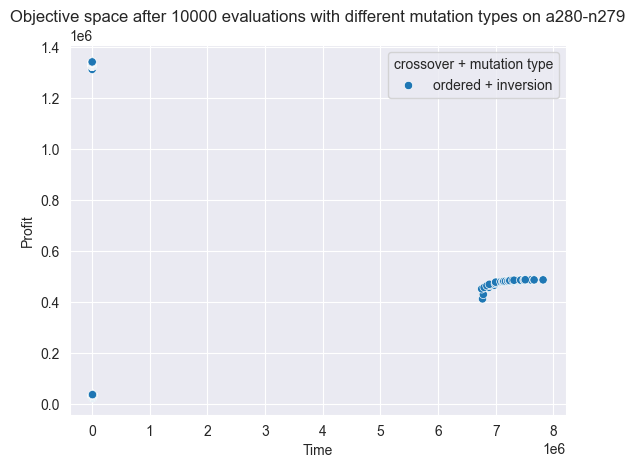

In [143]:
for dataname in df_muta['dataset_idx'].unique():
    scatter = sns.scatterplot(x='Time', y='Profit', hue='exp_type', data=df_muta[df_muta['dataset_idx'] == dataname])
    scatter.legend(title="crossover + mutation type")
    plt.title(f"Objective space after 10000 evaluations with different mutation types on {dataname}")
    plt.show()

### Crossover comparison

In [144]:
exp_type_corss = [0, 6, 10, 20]

df_corss = df_clean[df_clean['exp_type'].isin(exp_type_corss)]

In [145]:
df_corss.loc[:, 'exp_type'] = df_corss['exp_type'].replace(crossover_label)

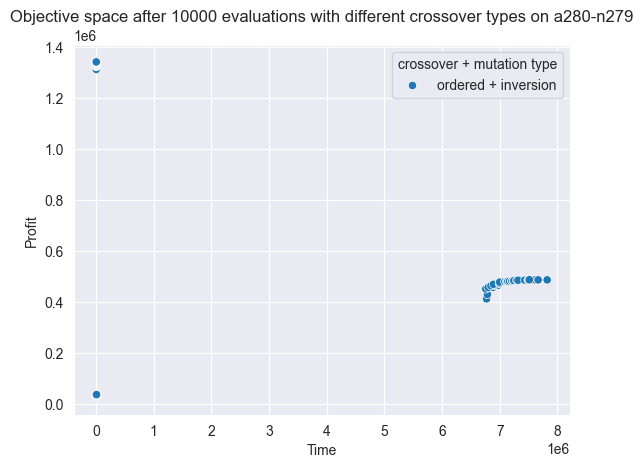

In [146]:
for dataname in df_corss['dataset_idx'].unique(): 
    scatter = sns.scatterplot(x='Time', y='Profit', hue='exp_type', data=df_corss[df_corss['dataset_idx'] == dataname])
    scatter.legend(title="crossover + mutation type")
    plt.title(f"Objective space after 10000 evaluations with different crossover types on {dataname}")
    plt.show()

### Hypervolume

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         450 non-null    float64
 1   Profit       450 non-null    float64
 2   Hypervolume  1000 non-null   float64
 3   exp_type     1000 non-null   int64  
 4   dataset_idx  1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [148]:
df_hv = df.iloc[:, [2, 3]].copy()
df_hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hypervolume  1000 non-null   float64
 1   exp_type     1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [149]:
df_hv['exp_type'].unique()

array([20, 13], dtype=int64)

In [150]:
df_hv.head()

,Hypervolume,exp_type
0,0.997470,20
1,1.000000,20
2,1.000000,20
3,0.999322,20
4,0.996279,20


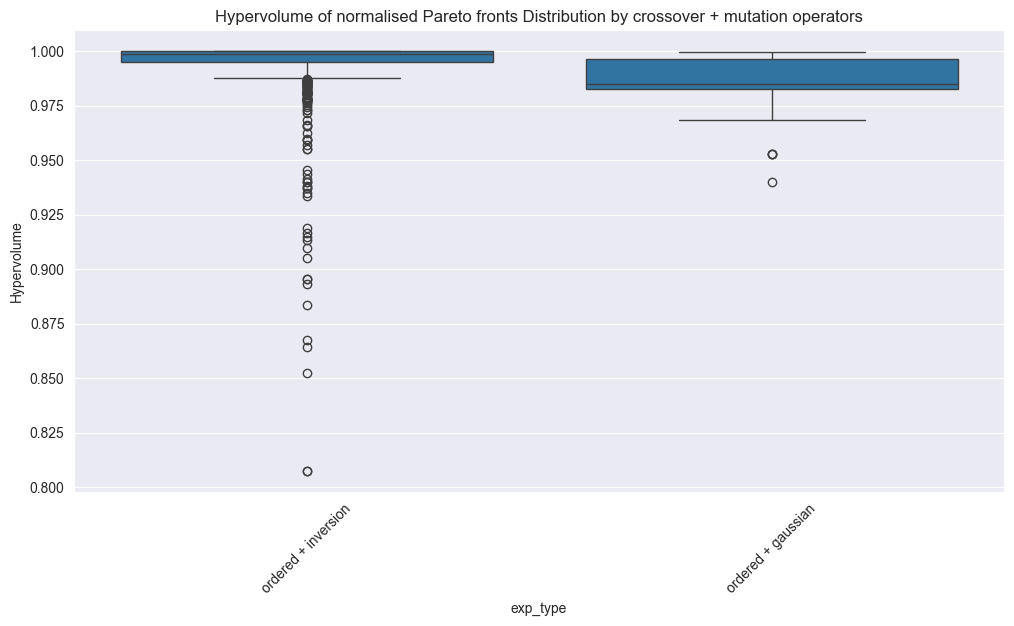

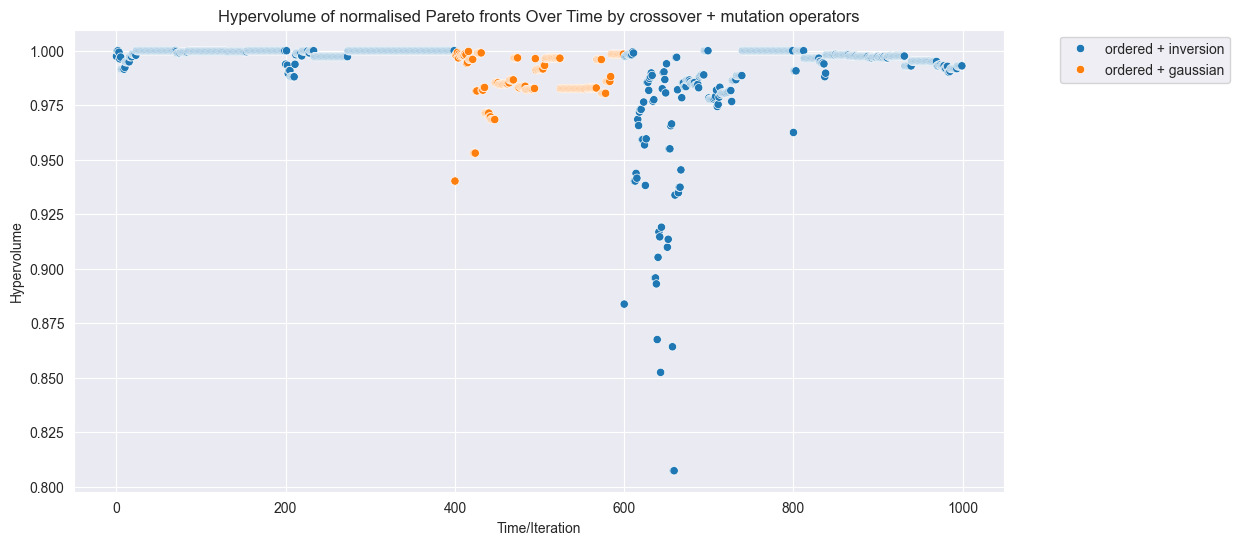

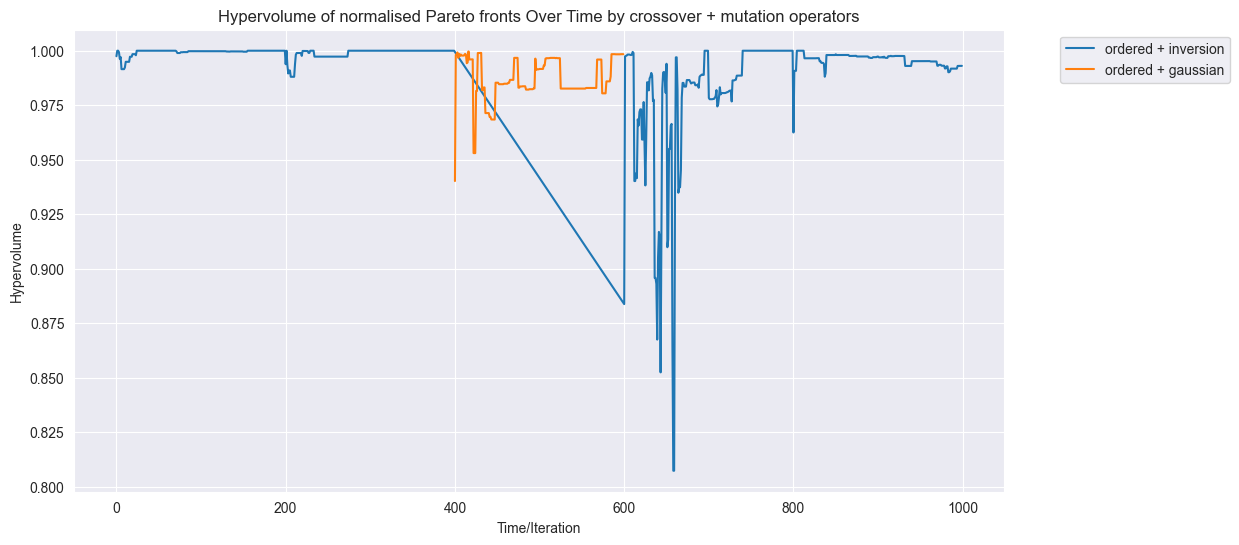

In [151]:
for old_value, new_value in crossover_label.items():
    df_hv['exp_type'] = df_hv['exp_type'].replace(old_value, new_value)

for old_value, new_value in mutation_label.items():
    df_hv['exp_type'] = df_hv['exp_type'].replace(old_value, new_value)

plt.figure(figsize=(12, 6))
sns.boxplot(x='exp_type', y='Hypervolume', data=df_hv)
plt.title('Hypervolume of normalised Pareto fronts Distribution by crossover + mutation operators')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_hv.index, y='Hypervolume', hue='exp_type', data=df_hv)
plt.title('Hypervolume of normalised Pareto fronts Over Time by crossover + mutation operators')
plt.xlabel('Time/Iteration')
plt.ylabel('Hypervolume')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

plt.figure(figsize=(12, 6))
for exp_type in df_hv['exp_type'].unique():
    subset = df_hv[df_hv['exp_type'] == exp_type]
    plt.plot(subset.index, subset['Hypervolume'], label=exp_type)

plt.xlabel('Time/Iteration')
plt.ylabel('Hypervolume')
plt.title('Hypervolume of normalised Pareto fronts Over Time by crossover + mutation operators')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

### The resluts of objective space on different datasets based on best choice of crossover and mutation

In [152]:
df0 = pd.DataFrame()

In [153]:
folder_path = '../output_files/'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('d'):
        # deal with results from the latest code
        file_path = os.path.join(folder_path, filename)
        data0 = pd.read_csv(file_path)
        df0 = pd.concat([df0, data0], ignore_index=True)

In [154]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         450 non-null    float64
 1   Profit       450 non-null    float64
 2   Hypervolume  1000 non-null   float64
 3   exp_type     1000 non-null   int64  
 4   dataset_idx  1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [155]:
df0.isnull().sum()

Time           550
Profit         550
Hypervolume      0
exp_type         0
dataset_idx      0
dtype: int64

In [ ]:
df0.loc[:, 'dataset_idx'] = df0['dataset_idx'].replace(dataset_label)

### Objective space on different dataset

In [156]:
df_tp0 = df0.iloc[:, [0, 1, 3, 4]].copy()
df_tp0.head()

,Time,Profit,exp_type,dataset_idx
0,11508.088579,22877.0,20,0
1,11583.089996,24613.0,20,0
2,11695.162468,24657.0,20,0
3,12053.620657,25138.0,20,0
4,12205.523657,26956.0,20,0


In [157]:
df_clean0 = df_tp0.dropna().reset_index(drop=True)
df_clean0.isnull().sum()

Time           0
Profit         0
exp_type       0
dataset_idx    0
dtype: int64

In [158]:
df_clean0.duplicated().sum()

65

In [159]:
df_clean0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         450 non-null    float64
 1   Profit       450 non-null    float64
 2   exp_type     450 non-null    int64  
 3   dataset_idx  450 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 14.2 KB


In [160]:
df_clean0.head()

,Time,Profit,exp_type,dataset_idx
0,11508.088579,22877.0,20,0
1,11583.089996,24613.0,20,0
2,11695.162468,24657.0,20,0
3,12053.620657,25138.0,20,0
4,12205.523657,26956.0,20,0


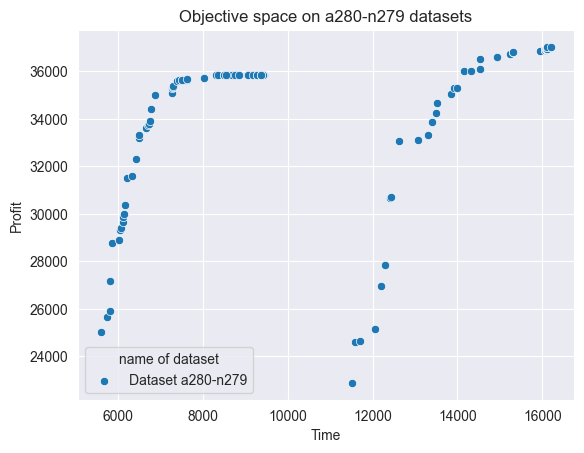

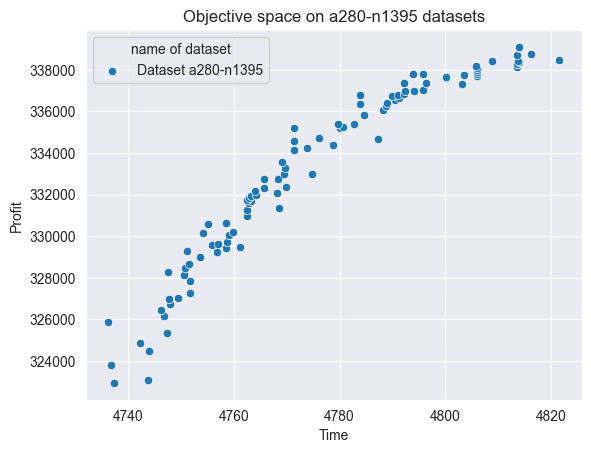

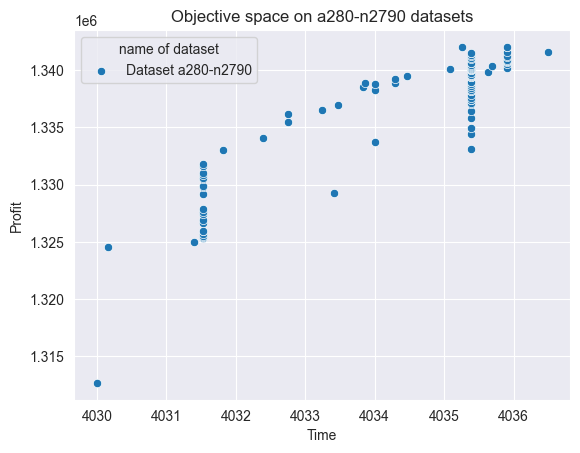

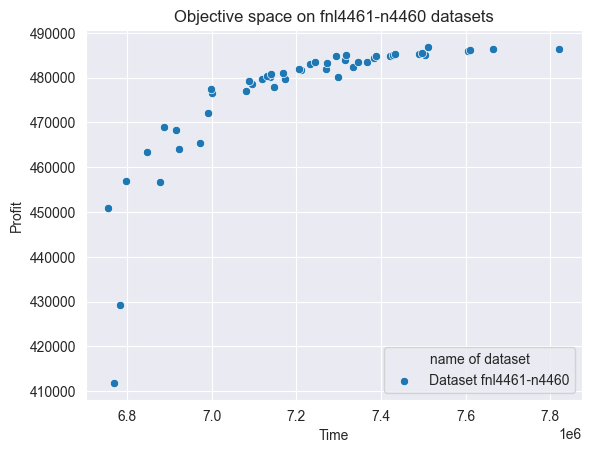

In [164]:
for idx, name in enumerate(df_clean0['dataset_idx'].unique()):
    scatter = sns.scatterplot(x='Time', y='Profit', 
                              data=df_clean0[df_clean0['dataset_idx'] == name], 
                              label=f"Dataset {name}")
    scatter.legend(title="name of dataset")
    plt.title(f"Objective space on {name} datasets")
    plt.show()

### Hypervolume on different dataset

In [165]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         450 non-null    float64
 1   Profit       450 non-null    float64
 2   Hypervolume  1000 non-null   float64
 3   exp_type     1000 non-null   int64  
 4   dataset_idx  1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [166]:
df_hv0 = df0.iloc[:, [2, 3, 4]].copy()
df_hv0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hypervolume  1000 non-null   float64
 1   exp_type     1000 non-null   int64  
 2   dataset_idx  1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [167]:
df_hv0['dataset_idx'].unique()

array([0, 1, 2, 3], dtype=int64)

In [168]:
df_hv0.head()

,Hypervolume,exp_type,dataset_idx
0,0.997470,20,0
1,1.000000,20,0
2,1.000000,20,0
3,0.999322,20,0
4,0.996279,20,0


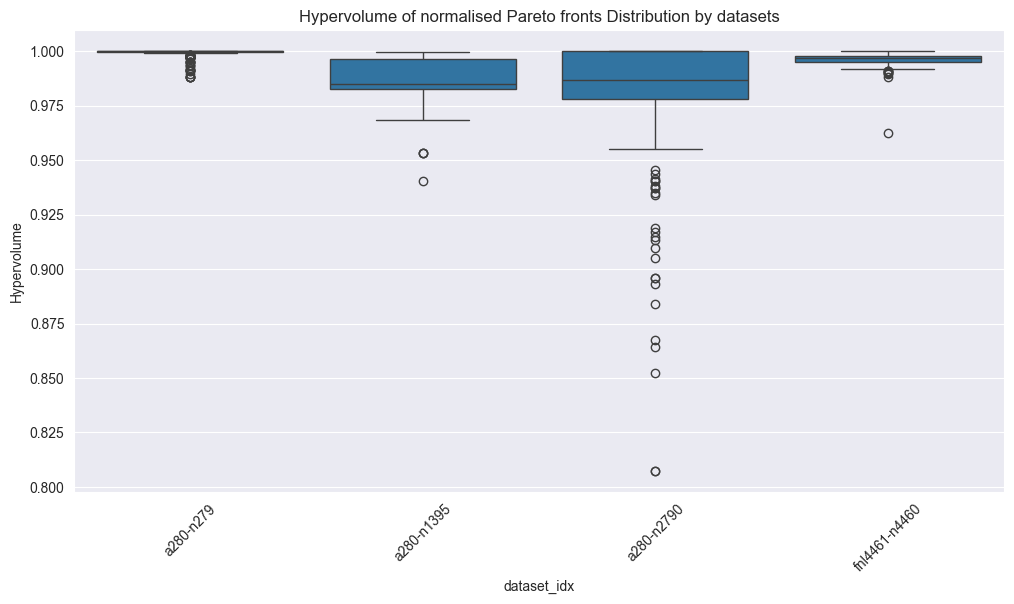

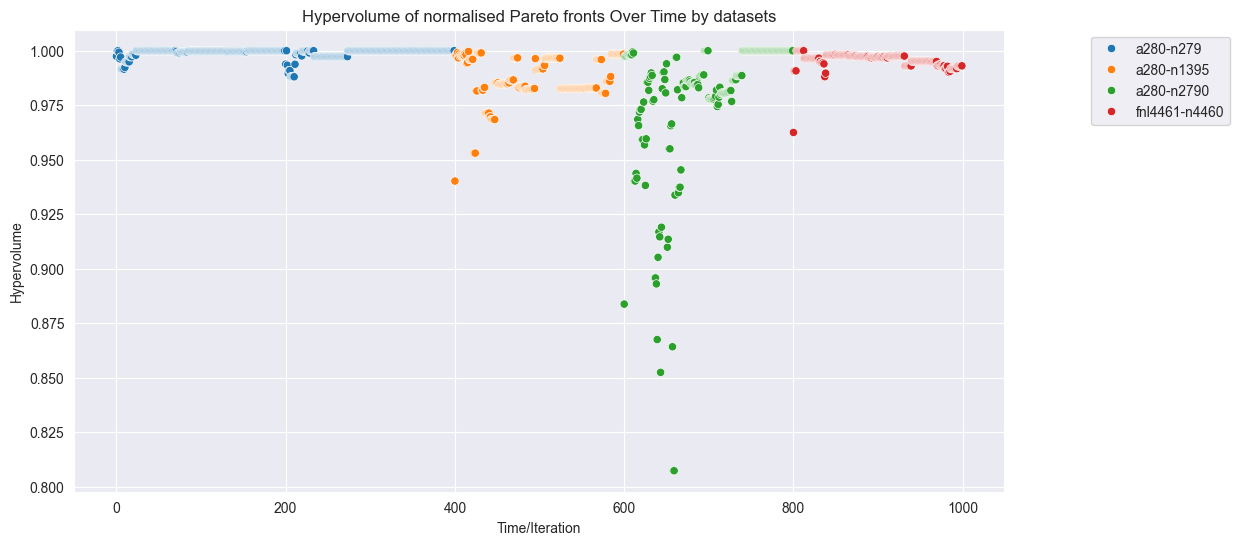

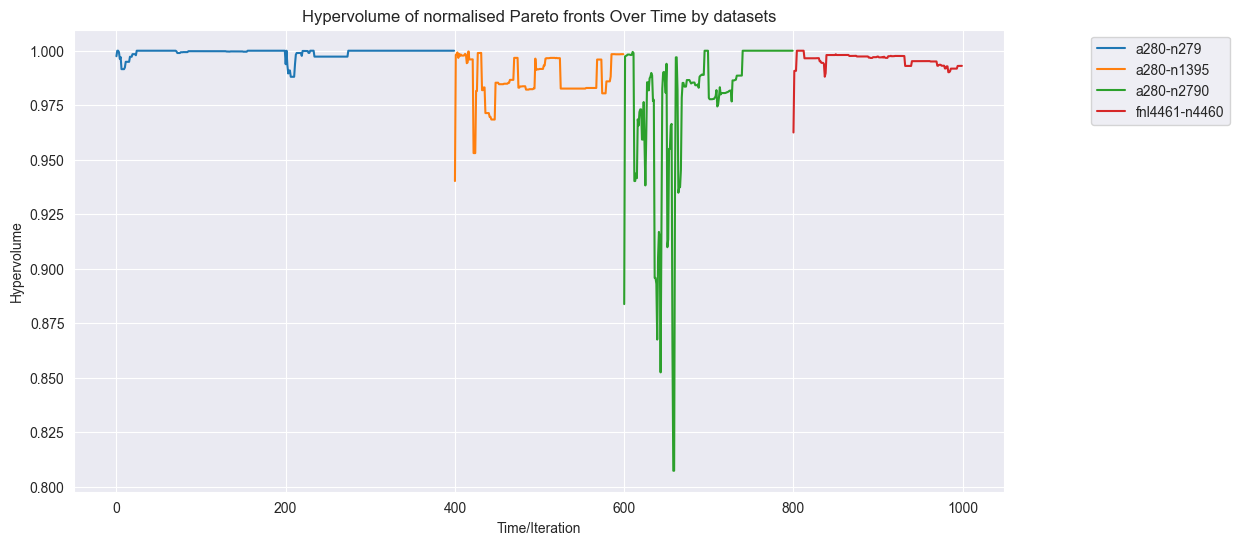

In [169]:
for old_value, new_value in dataset_label.items():
    df_hv0['dataset_idx'] = df_hv0['dataset_idx'].replace(old_value, new_value)

plt.figure(figsize=(12, 6))
sns.boxplot(x='dataset_idx', y='Hypervolume', data=df_hv0)
plt.title('Hypervolume of normalised Pareto fronts Distribution by datasets')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_hv0.index, y='Hypervolume', hue='dataset_idx', data=df_hv0)
plt.title('Hypervolume of normalised Pareto fronts Over Time by datasets')
plt.xlabel('Time/Iteration')
plt.ylabel('Hypervolume')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

plt.figure(figsize=(12, 6))
for dataset_idx in df_hv0['dataset_idx'].unique():
    subset = df_hv0[df_hv0['dataset_idx'] == dataset_idx]
    plt.plot(subset.index, subset['Hypervolume'], label=dataset_idx)

plt.xlabel('Time/Iteration')
plt.ylabel('Hypervolume')
plt.title('Hypervolume of normalised Pareto fronts Over Time by datasets')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()